In [3]:
import os
path = '/var/scratch/mxiao/data/'
os.chdir(path)

In [4]:
!ls

best_model.pt			       MAST_export_04032023.csv
best_test_model.pth		       model
best_test_modelv2.pth		       pair_comic.csv
best_tpl_model.pt		       pair_comic_v2.csv
Comic				       PML_v2
Comic files			       PML_v3
cropped_panels			       PML_v4
efficientnet_b0.pth		       PML_v5
example_logs			       PML_v6
example_logs_eff_0001lr		       PML_v7
example_logs_eff_v9		       PML_v8
example_logs_res101_0001lr	       PML_v9
example_logs_res101_aug_0001lr	       pre_effi_b0_model_v1.pth
example_logs_resnet101		       pre_effi_model_v1.pth
example_logs_resnet101_noaug	       pre_res101_model1.pth
example_logs_test		       pre_res50_model_v2.pth
example_tensorboard		       pre_res_model3.ckpt
example_tensorboard_eff_0001lr	       pretrained
example_tensorboard_eff_v9	       resnet101_aug.pth
example_tensorboard_res101_0001lr      resnet101_no_aug.pth
example_tensorboard_res101_aug_0001lr  resnet50_aug.pth
example_tensorboard_resnet101	       resnet50.pth
example_tensorboard_resnet101_

In [36]:
!ls 'Comic files'/'Fair Game'

page-10.jpg  page-14.jpg  page-18.jpg  page-2.jpg  page-6.jpg
page-11.jpg  page-15.jpg  page-19.jpg  page-3.jpg  page-7.jpg
page-12.jpg  page-16.jpg  page-1.jpg   page-4.jpg  page-8.jpg
page-13.jpg  page-17.jpg  page-20.jpg  page-5.jpg  page-9.jpg


In [45]:
! find 'Comic files' -type d -exec sh -c 'ls -1 "{}" | wc -l | grep -q "^[0-9]\{1,2\}$" && echo "{}"' \; | wc -l

815


In [46]:
!find 'Comic files' -type d -exec bash -c 'echo -n "{}: "; find "{}" -maxdepth 1 -type f -iname "*.jpg" | wc -l' \; | awk -F: '$2 < 10 {print $1}' | wc -l

210


In [44]:
!find model/train -type d | wc -l

749


In [37]:
!find 'Comic files' -type f \( -iname \*.jpg -o -iname \*.jpeg -o -iname \*.png \) | wc -l

12858


In [42]:
12858/813

15.81549815498155

In [39]:
!find 'Comic files' -type d | wc -l

816


In [5]:
import pandas as pd

In [6]:
df = pd.read_csv('filename_less_10_panel.csv')

In [7]:
df.head()

filename  total_page_count
0                   1986               174
1               13th Boy                50
2          1714 Baluarte               108
3  14 days in the desert               111
4        26 Needled Girl                35

In [32]:
df[df.filename == '13th Boy']

filename  total_page_count
1  13th Boy                50

/tmp/ipykernel_17011/2302876343.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.total_page_count, kde=False)


<Axes: xlabel='total_page_count'>

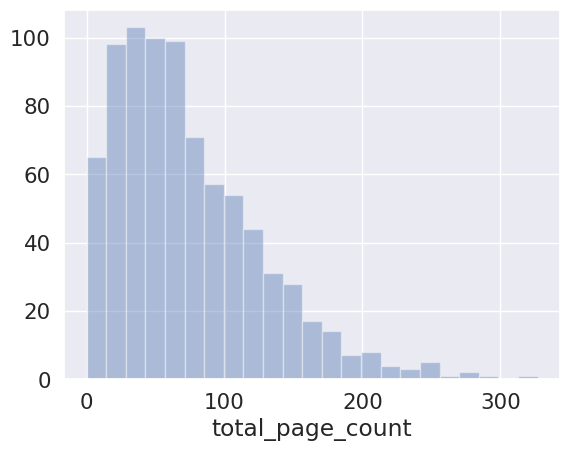

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid', font_scale=1.4)

sns.distplot(df.total_page_count, kde=False)

In [28]:
df.total_page_count.sum()

60136

In [9]:
df.filename.count()

813

In [14]:
df[df.total_page_count < 15].count()

filename            65
total_page_count    65
dtype: int64

In [15]:
813 - 65

748

In [2]:
import cv2
from tqdm import tqdm

ModuleNotFoundError: No module named 'cv2'

In [3]:
# !rm -rf 'cropped_panels'

In [4]:
import os

folder_path = 'cropped_panels'

def remove_dirs(path):
    for item in os.listdir(path):
        item_path = os.path.join(path, item)
        if os.path.isdir(item_path):
            os.system(f'rm -rf "{item_path}"')
remove_dirs(folder_path)

In [6]:
!ls

best_model.pt	filename_less_10_panel.csv  resnet50.pth
Comic		MAST_export_04032023.csv    resnet.h5
Comic files	model			    visualizations
cropped_panels	pre_res101_model1.pth	    wandb
FashionMNIST	pre_res_model3.ckpt


In [5]:
!ls -a 'cropped_panels/A Graveyard Tale'

ls: cannot access cropped_panels/A Graveyard Tale: No such file or directory


In [138]:
if not os.path.exists('cropped_panels'):
    os.makedirs('cropped_panels')

In [121]:
import os

# set the path to the directory containing the images
rm_path = 'Comic files/Tokyo Ghoul/panels'

# loop through the files in the directory and remove all image files
for filename in os.listdir(rm_path):
    if filename.endswith(".jpg") or filename.endswith(".png") or filename.endswith(".jpeg"):
        os.remove(os.path.join(rm_path, filename))


In [6]:
image_path = 'Comic files/'
output_dir = 'cropped_panels/'

In [7]:
def crop_panels(image_path, output_dir):
    
    # Read the image
    image = cv2.imread(image_path)

    # Check if the image was loaded successfully
    if image is None:
        print(f"Error: could not load image {image_path}")
        return
    
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Threshold the image to binarize it
    _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

    # Find the contours of the panels
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Crop the panels and save them to the output directory
    for i, contour in enumerate(contours):
        x, y, w, h = cv2.boundingRect(contour)
        if w >= 100 and h >= 100:
            panel = gray[y:y+h, x:x+w]
            panel_path = os.path.join(output_dir, f'{i}.png')
#             print(panel_path)
            cv2.imwrite(panel_path, panel)

In [8]:
def crop_panels_folder(input_folder, output_folder):
    # Iterate through each manga/comic folder in the input folder
    for manga_folder in tqdm(os.listdir(input_folder), desc='Manga folders', unit='folder'):
        manga_folder_path = os.path.join(input_folder, manga_folder)

        # Create a corresponding output folder in the output folder
        output_manga_folder = os.path.join(output_folder, manga_folder)
        os.makedirs(output_manga_folder, exist_ok=True)

        # Iterate through each page in the manga/comic folder
        for page_file in tqdm(os.listdir(manga_folder_path), desc='Page files', unit='file'):
            page_file_path = os.path.join(manga_folder_path, page_file)
            
            # Create a corresponding output folder for the page
            output_page_folder = os.path.join(output_manga_folder, os.path.splitext(page_file)[0])
            os.makedirs(output_page_folder, exist_ok=True)

            # Crop the panels from the page and save them to the output folder
            crop_panels(page_file_path, output_page_folder)

In [12]:
# crop_panels(image_path,output_dir)
crop_panels_folder(image_path, output_dir)

Page files:  40%|████████████████████████████▍                                          | 2/5 [00:00<00:00, 16.89file/s]


Page files:  94%|████████████████████████████████████████████████████████████████▉    | 16/17 [00:02<00:00,  6.84file/s]


Manga folders:   4%|██▋                                                            | 34/813 [00:45<22:36,  1.74s/folder]

Error: could not load image Comic files/Akira/panels



Page files:  47%|█████████████████████████████████▏                                    | 9/19 [00:00<00:00, 10.60file/s]


Page files:  19%|█████████████▌                                                        | 7/36 [00:00<00:02, 11.31file/s]


Page files:   0%|                                                                              | 0/10 [00:00<?, ?file/s]


Page files:  75%|███████████████████████████████████████████████████▊                 | 15/20 [00:01<00:00,  9.44file/s]


Page files:  67%|██████████████████████████████████████████████▋                       | 8/12 [00:00<00:00, 11.23file/s]


Page files: 100%|█████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 17.29file/s]


Manga folders:  15%|█████████▌                                                    | 125/813 [02:52<10:45,  1.07folder/s]


Page files:   0%|                                                                               | 0/8 [00:00<?, ?file/s]


Page files:  82%|████████████████████████████████████████████████████████▍            | 18/22 [00:01<00:00, 10.57file/s]


Page files:   0%|                                                                              | 0/18 [00:00<?, ?file/s]


Manga folders:  22%|█████████████▍                                                | 176/813 [04:03<09:26,  1.13folder/s]


Page files:  48%|█████████████████████████████████                                    | 12/25 [00:00<00:00, 14.22file/s]


Page files:  31%|█████████████████████▌                                                | 4/13 [00:00<00:00, 10.28file/s]


Page files:  29%|████████████████████▍                                                 | 7/24 [00:00<00:01,  8.88file/s]


Page files:  44%|███████████████████████████████▌                                       | 4/9 [00:00<00:00,  8.81file/s]


Page files:  14%|██████████                                                            | 3/21 [00:01<00:09,  1.80file/s]


Page files:  60%|█████████████████████████████████████████▍                           | 12/20 [00:00<00:00, 23.15file/s]


Page files:  50%|███████████████████████████████████▌                                   | 2/4 [00:00<00:00,  8.88file/s]


Page files:  12%|████████▊                                                             | 2/16 [00:00<00:03,  3.80file/s]


Manga folders:  35%|█████████████████████▍                                        | 281/813 [06:51<10:55,  1.23s/folder]


Page files:  80%|███████████████████████████████████████████████████████▏             | 24/30 [00:04<00:00,  6.36file/s]


Manga folders:  37%|███████████████████████                                       | 303/813 [07:27<08:19,  1.02folder/s]


Page files:   0%|                                                                              | 0/20 [00:00<?, ?file/s]


Page files:  86%|███████████████████████████████████████████████████████████▌         | 19/22 [00:03<00:00,  5.16file/s]


Page files:  76%|████████████████████████████████████████████████████▍                | 19/25 [00:03<00:01,  5.60file/s]


Page files:   4%|██▌                                                                   | 1/28 [00:00<00:03,  8.51file/s]


Page files:  12%|████████▏                                                             | 2/17 [00:00<00:01, 12.89file/s]


Page files:   0%|                                                                               | 0/9 [00:00<?, ?file/s]


Page files: 100%|███████████████████████████████████████████████████████████████████████| 8/8 [00:02<00:00,  3.02file/s]


Page files:  19%|█████████████▎                                                        | 4/21 [00:00<00:01, 11.78file/s]


Page files:  48%|█████████████████████████████████                                    | 12/25 [00:01<00:01, 10.62file/s]


Manga folders:  53%|█████████████████████████████████                             | 434/813 [10:46<12:17,  1.94s/folder]


Page files:   0%|                                                                              | 0/16 [00:00<?, ?file/s]


Page files:  76%|████████████████████████████████████████████████████▎                | 22/29 [00:01<00:00, 17.42file/s]


Manga folders:  56%|███████████████████████████████████                           | 459/813 [11:23<06:47,  1.15s/folder]
Page files: 0file [00:00, ?file/s]

Page files:  42%|████████████████████████████▊                                        | 10/24 [00:00<00:01, 13.07file/s]


Page files:  86%|███████████████████████████████████████████████████████████▏         | 18/21 [00:01<00:00, 13.68file/s]


Page files:  77%|█████████████████████████████████████████████████████▎               | 17/22 [00:00<00:00, 19.34file/s]


Page files:  33%|███████████████████████▎                                              | 6/18 [00:03<00:09,  1.22file/s]


Page files: 100%|█████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 17.67file/s]


Page files:  20%|██████████████                                                        | 3/15 [00:00<00:01,  7.93file/s]


Page files:  38%|██████████████████████████▋                                            | 3/8 [00:00<00:00,  8.09file/s]


Page files:   0%|                                                                              | 0/18 [00:00<?, ?file/s]


Page files:  24%|████████████████▊                                                     | 6/25 [00:00<00:01, 11.48file/s]


Page files:  20%|██████████████                                                        | 2/10 [00:00<00:00, 16.67file/s]


Page files:  62%|████████████████████████████████████████████▍                          | 5/8 [00:00<00:00, 10.55file/s]


Page files:  91%|███████████████████████████████████████████████████████████████      | 32/35 [00:02<00:00, 14.76file/s]


Page files:  42%|████████████████████████████▊                                        | 10/24 [00:01<00:02,  4.79file/s]


Page files:  52%|████████████████████████████████████▏                                | 11/21 [00:01<00:00, 10.96file/s]


Page files:   0%|                                                                              | 0/11 [00:00<?, ?file/s]


Page files:  82%|████████████████████████████████████████████████████████▊            | 28/34 [00:02<00:00, 10.76file/s]


Page files:  12%|████████                                                              | 3/26 [00:00<00:03,  7.54file/s]


Page files:  60%|██████████████████████████████████████████                            | 6/10 [00:00<00:00, 16.44file/s]


Page files:   0%|                                                                               | 0/4 [00:00<?, ?file/s]


Page files:  95%|█████████████████████████████████████████████████████████████████▎   | 18/19 [00:04<00:00,  4.62file/s]


Page files:  48%|█████████████████████████████████▍                                   | 15/31 [00:01<00:01,  8.34file/s]


Page files: 100%|███████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 15.38file/s]


Page files: 100%|█████████████████████████████████████████████████████████████████████| 14/14 [00:01<00:00,  9.48file/s]


Manga folders:  92%|█████████████████████████████████████████████████████████     | 748/813 [18:15<01:11,  1.11s/folder]

Error: could not load image Comic files/Tokyo Ghoul/panels



Page files:   6%|███▉                                                                  | 1/18 [00:00<00:02,  6.67file/s]


Page files:  57%|███████████████████████████████████████▍                             | 16/28 [00:03<00:02,  5.11file/s]


Page files:  88%|████████████████████████████████████████████████████████████▋        | 22/25 [00:05<00:00,  4.16file/s]


Page files:  88%|████████████████████████████████████████████████████████████▋        | 29/33 [00:08<00:01,  2.95file/s]


Page files:   8%|█████▊                                                                | 2/24 [00:00<00:01, 12.67file/s]


Manga folders: 100%|██████████████████████████████████████████████████████████████| 813/813 [20:05<00:00,  1.48s/folder]


In [13]:
import os
import pandas as pd

page_counts = []

for filename in os.listdir(output_dir):
    manga_folder_path = os.path.join(output_dir, filename)
    total_page_count = 0
    for page in os.listdir(manga_folder_path):
        page_folder_path = os.path.join(manga_folder_path, page) 
        page_count = len(os.listdir(page_folder_path))
        total_page_count += page_count
    page_counts.append({"filename": filename, "total_page_count": total_page_count})

df = pd.DataFrame(page_counts)
print(df)        

                     filename  total_page_count
0                        1986               174
1                    13th Boy                50
2               1714 Baluarte               108
3       14 days in the desert               111
4             26 Needled Girl                35
..                        ...               ...
808  Zaalim Manjha Cell No- 9               102
809           Zaginiony swiat               114
810           Zavalli Polat 1                81
811           Zavalli Polat 2               144
812                     Zorro                70

[813 rows x 2 columns]


In [14]:
pd.set_option('display.max_rows', None)

In [15]:
df[df.total_page_count<16].shape

(76, 2)

In [16]:
df[df.filename == 'Akira']

filename  total_page_count
33    Akira               136

In [258]:
df.to_csv('filename_less_10_panel.csv',index=False)

In [253]:
# Loop through all the images in the directory
import matplotlib.pyplot as plt
dir_path = 'cropped_panels/Galago - Erik Svetloft/page-2'
# Loop through all the images in the directory
for filename in os.listdir(dir_path):
    if filename.endswith('.png') or filename.endswith('.jpg'):
        # Read the image
        image_path = os.path.join(dir_path, filename)
        image = plt.imread(image_path)

        # Get the size of the image
        height, width = image.shape
        size_str = f'Size: {width} x {height}'

        # Display the image and its size
        fig, ax = plt.subplots()
        ax.imshow(image)
        ax.set_title(f'{filename}\n{size_str}')
        plt.show()

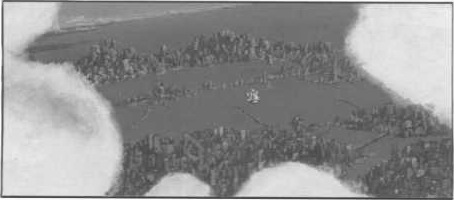

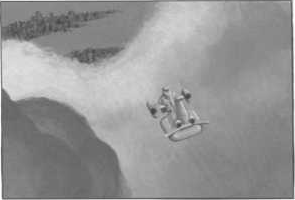

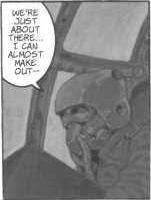

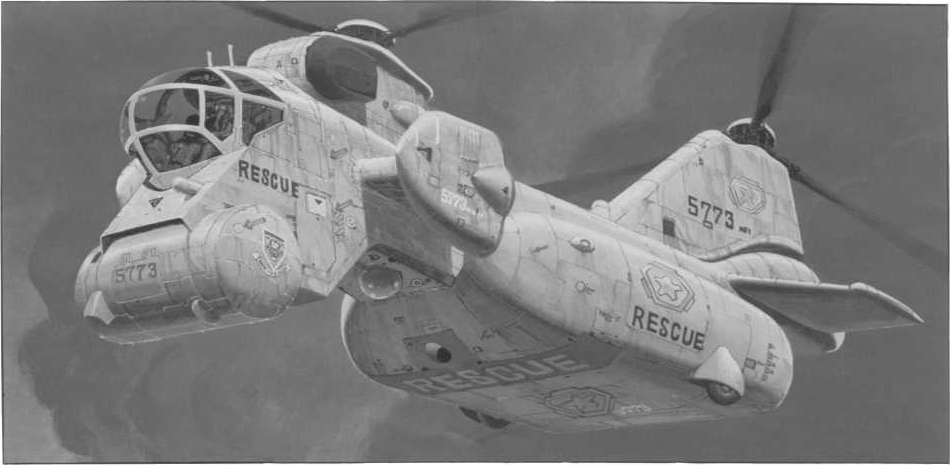

In [17]:
from PIL import Image
from IPython.display import display

import os

folder_path = 'cropped_panels/Akira/page-3'

for filename in os.listdir(folder_path):
    if filename.endswith('.png'):
        img_path = os.path.join(folder_path, filename)
        display(Image.open(img_path))


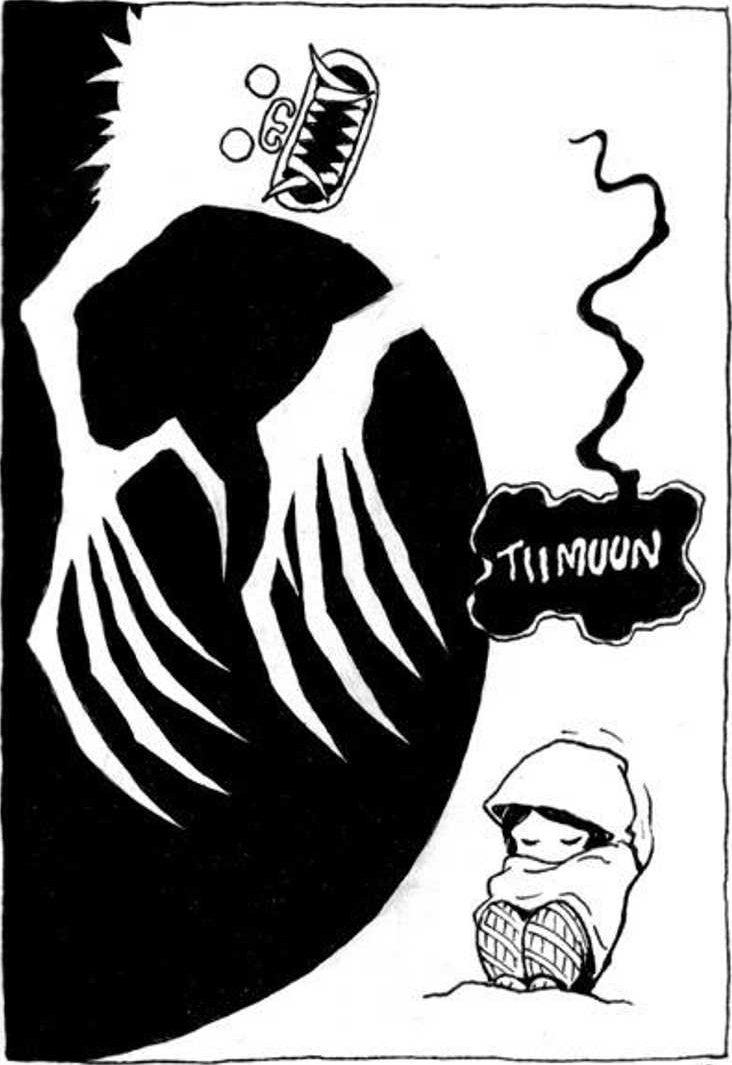

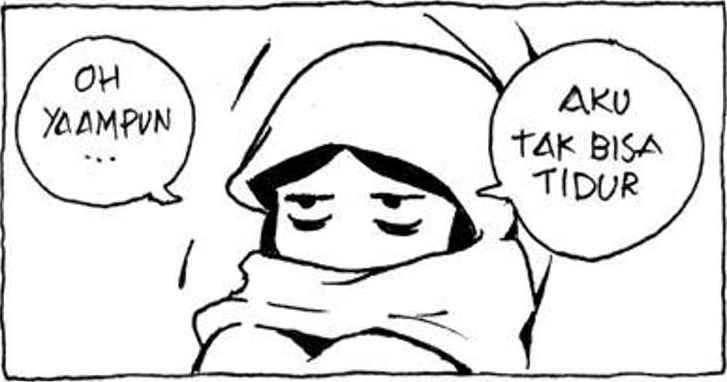

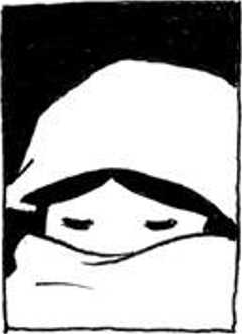

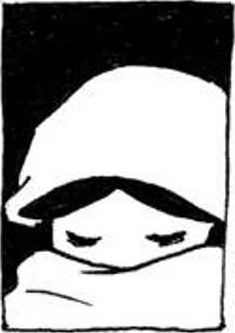

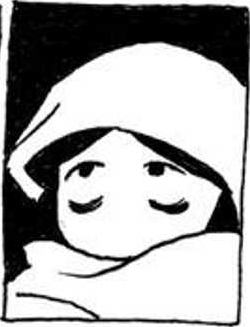

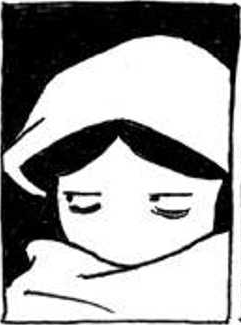

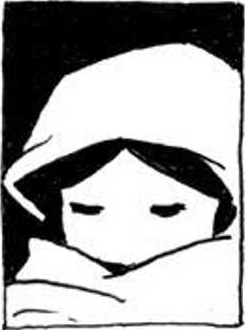

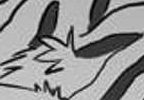

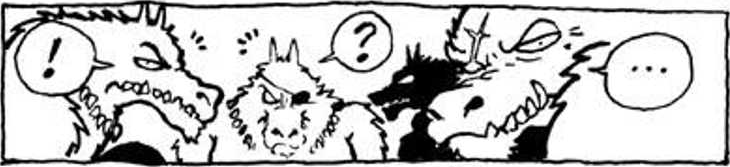

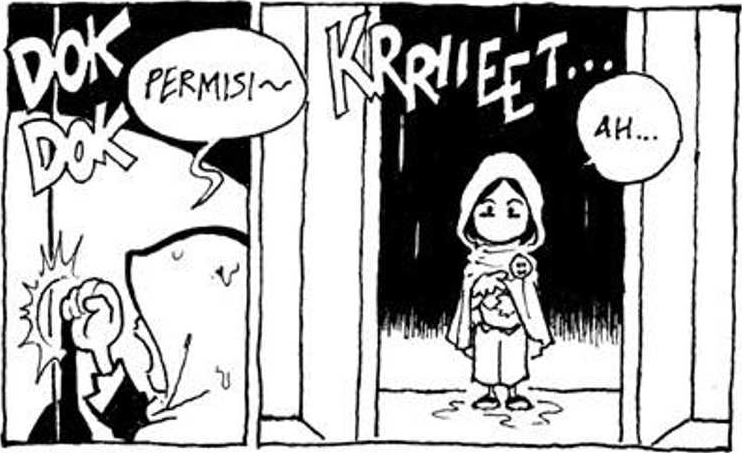

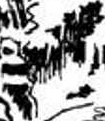

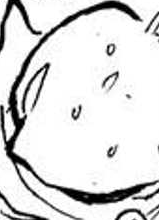

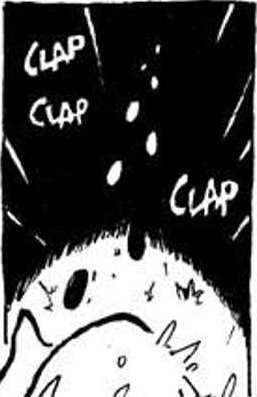

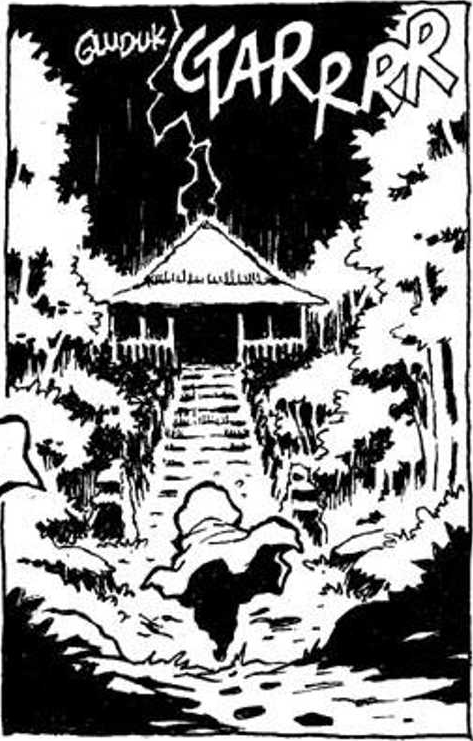

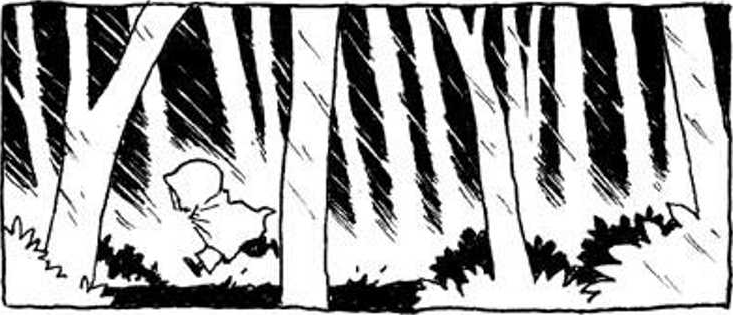

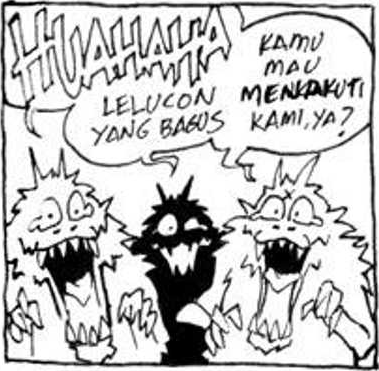

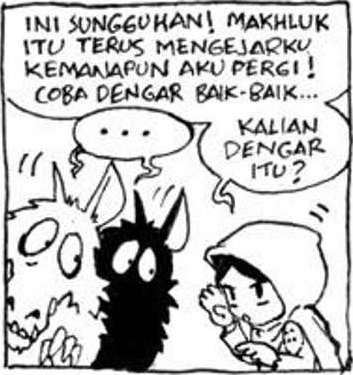

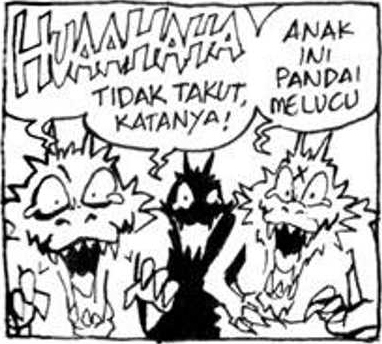

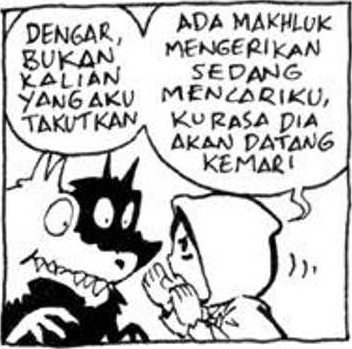

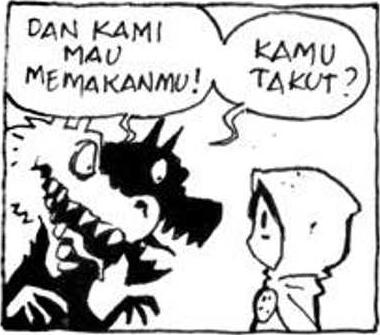

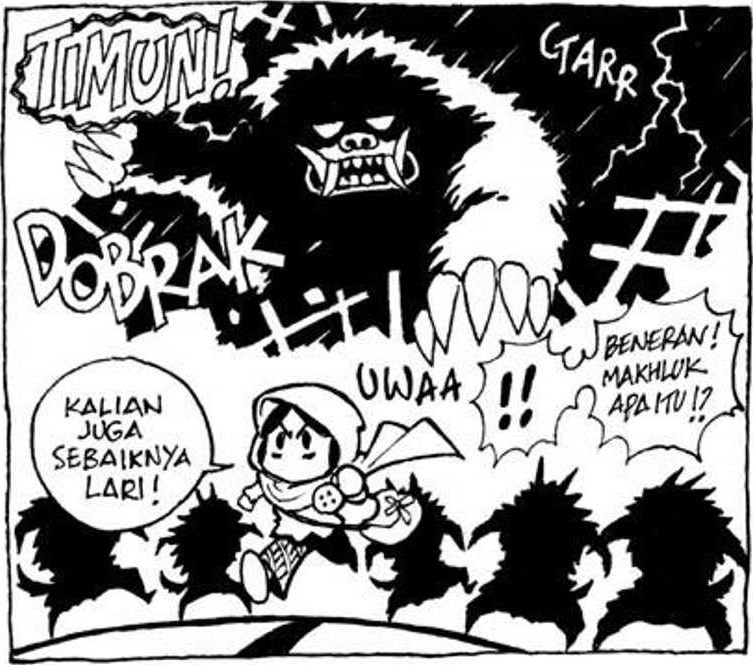

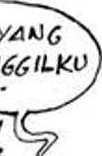

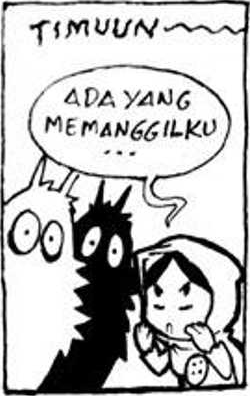

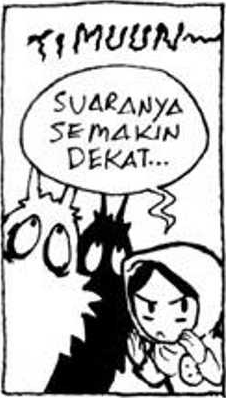

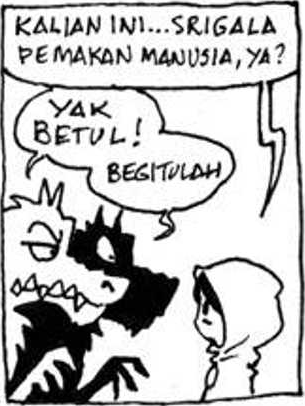

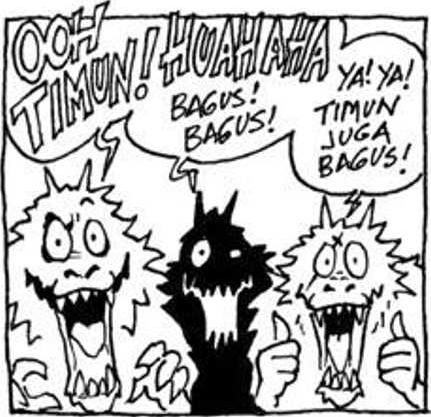

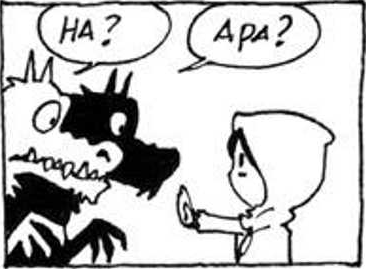

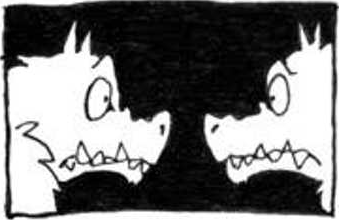

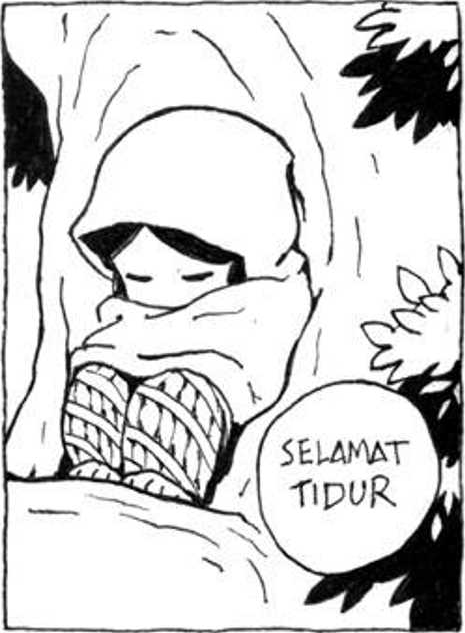

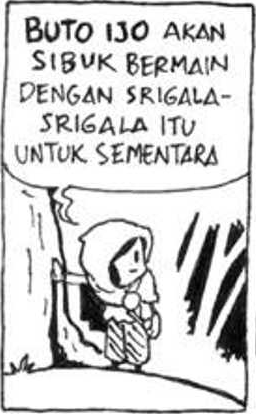

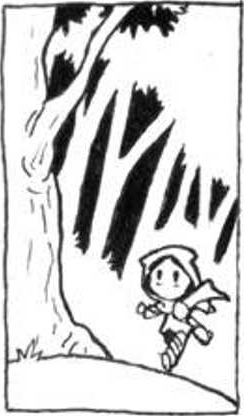

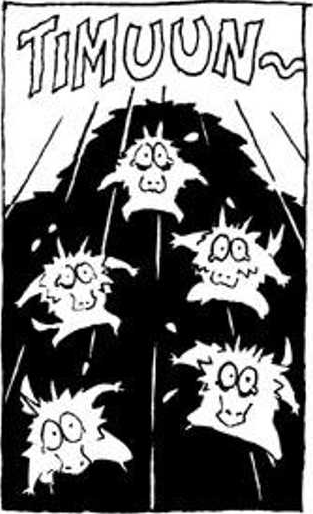

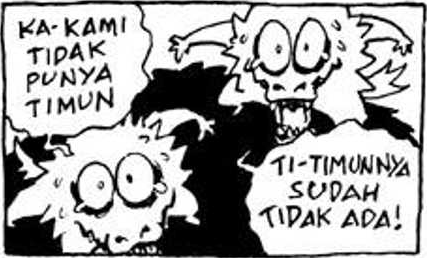

In [9]:
from PIL import Image
from IPython.display import display

import os

folder_path = 'model/train/Timun'

for filename in os.listdir(folder_path):
    if filename.endswith('.png'):
        img_path = os.path.join(folder_path, filename)
        display(Image.open(img_path))
